# What is the most optimal skill to learn for entry level data roles?
#### Methodology

1. Continue from last notebook to find percent of postings with skill
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
# Filter data for entry level data jobs in the United States
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_data_US = df[(df['job_country'] == 'United States') & (df['job_title_short'].isin(job_titles))].copy()
df_data_US = df_data_US.dropna(subset=['salary_year_avg'])

# Explode the job_skills column
df_data_explode = df_data_US.explode('job_skills')
df_data_explode[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
92,120000.0,sql
92,120000.0,python
100,228222.0,sql
100,228222.0,r
100,228222.0,python


In [17]:
# Get the skill count and median salary for each skill
df_data_skills = df_data_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_data_skills = df_data_skills.rename(columns={'count': 'skill_count', 'median': 'Median Salary'})
df_data_skills

,skill_count,Median Salary
job_skills,,
sql,7081,115000.0
python,6796,125000.0
r,3202,115800.0
tableau,2767,110000.0
excel,2440,90000.0
...,...,...
chainer,1,100000.0
suse,1,125000.0
next.js,1,145000.0


In [18]:
# Calculate the percentage of jobs that require each skill

data_job_count = len(df_data_US)

df_data_skills['skill_percent'] = df_data_skills['skill_count'] / data_job_count * 100

df_data_skills

,skill_count,Median Salary,skill_percent
job_skills,,,
sql,7081,115000.0,59.917076
python,6796,125000.0,57.505500
r,3202,115800.0,27.094263
tableau,2767,110000.0,23.413437
excel,2440,90000.0,20.646471
...,...,...,...
chainer,1,100000.0,0.008462
suse,1,125000.0,0.008462
next.js,1,145000.0,0.008462


In [20]:
# Filter the skills that are in high demand
skill_percent = 10

df_data_skills_high_demand = df_data_skills[df_data_skills['skill_percent'] > skill_percent]
df_data_skills_high_demand

,skill_count,Median Salary,skill_percent
job_skills,,,
sql,7081,115000.0,59.917076
python,6796,125000.0,57.505500
r,3202,115800.0,27.094263
tableau,2767,110000.0,23.413437
excel,2440,90000.0,20.646471
aws,2295,130000.0,19.419530
sas,2074,105000.0,17.549501
spark,1780,134775.0,15.061770
azure,1629,124000.0,13.784058


# Scatterplot of Top Paying Skills vs High Demand

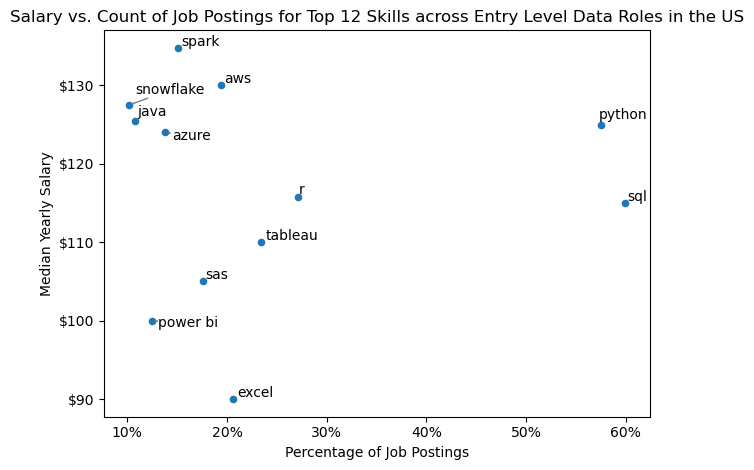

In [28]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_data_skills_high_demand.plot(kind='scatter', x='skill_percent', y='Median Salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_data_skills_high_demand.index):
    texts.append(plt.text(df_data_skills_high_demand['skill_percent'].iloc[i], df_data_skills_high_demand['Median Salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percentage of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top 12 Skills across Entry Level Data Roles in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, loc: "${:,}".format(int(y/1000))))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

In [29]:
# Extract technology skills from job_type_skills column
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['alteryx',
  'powerpoint',
  'sharepoint',
  'nuix',
  'ssrs',
  'visio',
  'microstrategy',
  'sheets',
  'cognos',
  'msaccess',
  'power bi',
  'ms access',
  'datarobot',
  'ssis',
  'word',
  'spss',
  'spreadsheet',
  'sap',
  'tableau',
  'powerbi',
  'qlik',
  'excel',
  'splunk',
  'dax',
  'esquisse',
  'outlook',
  'looker',
  'sas'],
 'programming': ['scala',
  'crystal',
  'sass',
  'julia',
  'c++',
  'delphi',
  'vba',
  'javascript',
  'nosql',
  'r',
  'matlab',
  'shell',
  'no-sql',
  't-sql',
  'c',
  'ruby',
  'dart',
  'solidity',
  'css',
  'erlang',
  'go',
  'bash',
  'python',
  'perl',
  'f#',
  'visual basic',
  'powershell',
  'swift',
  'cobol',
  'haskell',
  'lua',
  'sql',
  'kotlin',
  'groovy',
  'elixir',
  'clojure',
  'ocaml',
  'golang',
  'java',
  'vb.net',
  'pascal',
  'visualbasic',
  'mongodb',
  'php',
  'assembly',
  'html',
  'typescript',
  'apl',
  'objective-c',
  'mongo',
  'rust',
  'lisp',
  'c#',
  'sas',
  'fort

In [30]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,alteryx
0,analyst_tools,powerpoint
0,analyst_tools,sharepoint
0,analyst_tools,nuix
0,analyst_tools,ssrs
...,...,...
9,sync,twilio
9,sync,symphony
9,sync,webex
9,sync,google chat


In [35]:
# Merge the high demand skills with the technology skills
df_tech_skills = df_data_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')
df_tech_skills

,skill_count,Median Salary,skill_percent,technology,skills
0,7081,115000.0,59.917076,programming,sql
1,6796,125000.0,57.505500,programming,python
2,3202,115800.0,27.094263,programming,r
3,2767,110000.0,23.413437,analyst_tools,tableau
4,2440,90000.0,20.646471,analyst_tools,excel
5,2295,130000.0,19.419530,cloud,aws
6,2074,105000.0,17.549501,analyst_tools,sas
7,2074,105000.0,17.549501,programming,sas
8,1780,134775.0,15.061770,libraries,spark
9,1629,124000.0,13.784058,cloud,azure


# Scatterplot of Top Paying vs High Demand Skills Categorized by Technologies

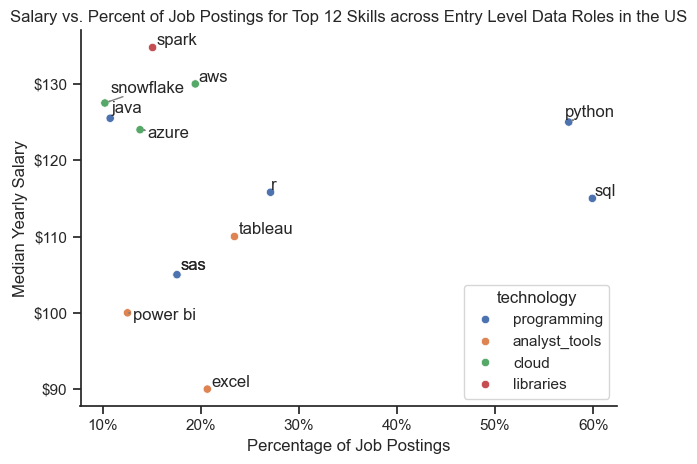

In [39]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=df_tech_skills, x='skill_percent', y='Median Salary', hue='technology')

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_tech_skills['skills']):
    texts.append(plt.text(df_tech_skills['skill_percent'].iloc[i], df_tech_skills['Median Salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Percentage of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Percent of Job Postings for Top 12 Skills across Entry Level Data Roles in the US')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, loc: "${:,}".format(int(y/1000))))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()